In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
p=np.arange(0.1,1,0.2)

In [3]:
p

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [4]:
sigma=np.arange(2,5,1)
sigma

array([2, 3, 4])

In [5]:
def gaussiana(x,mu,s):
    y=np.exp(-(x-mu)**2/(2*s**2))/(2*np.pi*s**2)**(1/2)
    return y

In [6]:
x=np.arange(-40,40,0.1)

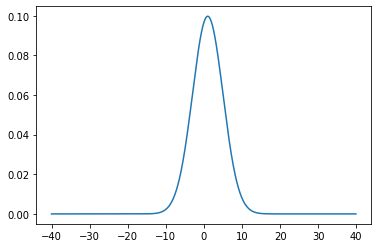

In [7]:
plt.figure()
plt.plot(x,gaussiana(x,1,sigma[2]))

In [9]:
def probMas(x, mu, s, p):
    norm=(p*gaussiana(x,1,s)+(1-p)*gaussiana(x,-1,s))
    z=p*gaussiana(x,mu,s)/norm
    return z
def probMenos(x, mu, s, p):
    norm=(p*gaussiana(x,1,s)+(1-p)*gaussiana(x,-1,s))
    z=(1-p)*gaussiana(x,mu,s)/norm
    return z

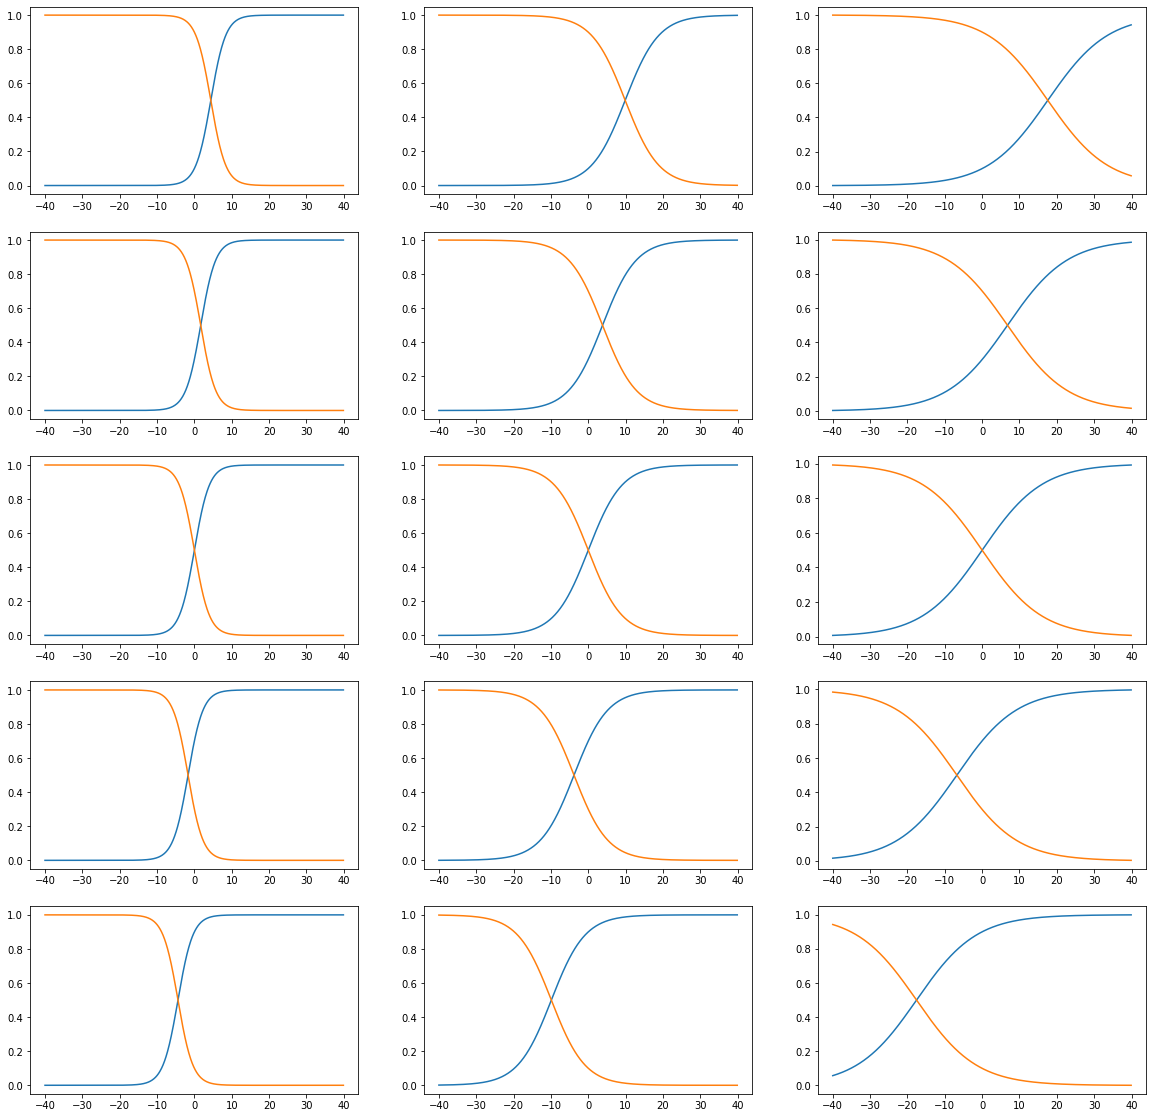

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(5,3,1)
plt.plot(x,probMas(x,1,sigma[0], p[0]))
plt.plot(x,probMenos(x,-1,sigma[0], p[0]))
plt.subplot(5,3,2)
plt.plot(x,probMas(x,1,sigma[1], p[0]))
plt.plot(x,probMenos(x,-1,sigma[1], p[0]))
plt.subplot(5,3,3)
plt.plot(x,probMas(x,1,sigma[2], p[0]))
plt.plot(x,probMenos(x,-1,sigma[2], p[0]))



plt.subplot(5,3,4)
plt.plot(x,probMas(x,1,sigma[0], p[1]))
plt.plot(x,probMenos(x,-1,sigma[0], p[1]))
plt.subplot(5,3,5)
plt.plot(x,probMas(x,1,sigma[1], p[1]))
plt.plot(x,probMenos(x,-1,sigma[1], p[1]))
plt.subplot(5,3,6)
plt.plot(x,probMas(x,1,sigma[2], p[1]))
plt.plot(x,probMenos(x,-1,sigma[2], p[1]))



plt.subplot(5,3,7)
plt.plot(x,probMas(x,1,sigma[0], p[2]))
plt.plot(x,probMenos(x,-1,sigma[0], p[2]))
plt.subplot(5,3,8)
plt.plot(x,probMas(x,1,sigma[1], p[2]))
plt.plot(x,probMenos(x,-1,sigma[1], p[2]))
plt.subplot(5,3,9)
plt.plot(x,probMas(x,1,sigma[2], p[2]))
plt.plot(x,probMenos(x,-1,sigma[2], p[2]))



plt.subplot(5,3,10)
plt.plot(x,probMas(x,1,sigma[0], p[3]))
plt.plot(x,probMenos(x,-1,sigma[0], p[3]))
plt.subplot(5,3,11)
plt.plot(x,probMas(x,1,sigma[1], p[3]))
plt.plot(x,probMenos(x,-1,sigma[1], p[3]))
plt.subplot(5,3,12)
plt.plot(x,probMas(x,1,sigma[2], p[3]))
plt.plot(x,probMenos(x,-1,sigma[2], p[3]))



plt.subplot(5,3,13)
plt.plot(x,probMas(x,1,sigma[0], p[4]))
plt.plot(x,probMenos(x,-1,sigma[0], p[4]))
plt.subplot(5,3,14)
plt.plot(x,probMas(x,1,sigma[1], p[4]))
plt.plot(x,probMenos(x,-1,sigma[1], p[4]))
plt.subplot(5,3,15)
plt.plot(x,probMas(x,1,sigma[2], p[4]))
plt.plot(x,probMenos(x,-1,sigma[2], p[4]))

plt.savefig("probMasMenos.png")

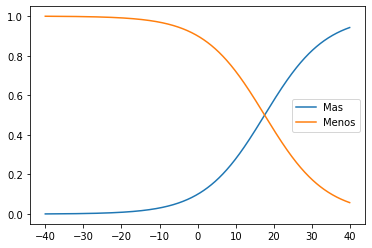

In [11]:
plt.figure()
plt.plot(x,probMas(x,1,sigma[2], p[0]), label="Mas")
plt.plot(x,probMenos(x,-1,sigma[2], p[0]), label="Menos")
plt.legend()

In [12]:
def Vcambio(s,p):
    v=s**2*np.log((1-p)/p)/2
    return v

In [13]:
Vcambio(sigma[2],p[0])

17.577796618689757

In [14]:
p1=np.array([1.0/2.0,2.0/3.0 ])
p1[1]

0.6666666666666666

In [20]:
import math
math.erfc(1)

0.15729920705028513

In [21]:
Vc=np.zeros([2,3])
for i in range(2):
    for j in range(3):
        Vc[i][j]=Vcambio(sigma[j],p1[i])
        
Vc        

array([[ 0.        ,  0.        ,  0.        ],
       [-1.38629436, -3.11916231, -5.54517744]])

In [32]:
def probError(s,p):
    Vc=Vcambio(s,p)
    d=np.zeros(len(s))
    for i in range(len(s)):
        d[i]=(p/2)*(math.erfc((1-Vc[i])/np.sqrt(2*s[i]**2)))+(1-p)/2*math.erfc((Vc[i]+1)/np.sqrt(2*s[i]**2))
    return d

In [33]:
s=np.arange(0.1,10,0.1)

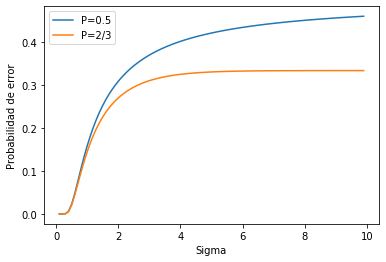

In [36]:
plt.figure()
plt.plot(s,probError(s,0.5),label="P=0.5")
plt.plot(s,probError(s,2.0/3.0), label="P=2/3")
plt.legend()
plt.xlabel("Sigma")
plt.ylabel("Probabilidad de error")
plt.savefig("ErrorVsSigma.png")

In [37]:
x=np.array([-11.8, -35.4, 1.6, 2.7, 5.3, -3.8, -3.7, -9.8,
2.5, 5.0])
y0=np.arange(0,25,0.01)

In [38]:
def posterior(x,y0):
    post=np.zeros(len(y0))
    for i in range(len(y0)):
        mult=1
        for j in range(len(x)):
            mult=mult*(1/(y0[i]**2+x[j]**2))
        post[i]=y0[i]**9*mult
    return post    

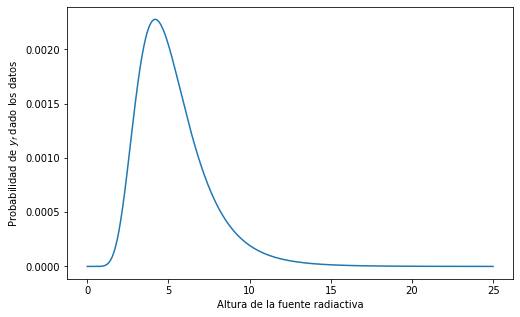

In [50]:
plt.figure(figsize=(8,5))
pY0=posterior(x,y0)/(np.sum(posterior(x,y0)))
plt.plot(y0, pY0)
plt.ylabel("Probabilidad de "+ r"$y_f$"+ " dado los datos")
plt.xlabel("Altura de la fuente radiactiva")
plt.savefig("fuenteRadiactiva.png")

In [40]:
y0[posterior(x,y0)==np.max(posterior(x,y0))]

array([4.18])

In [41]:
y02=np.sum(pY0*y0*y0)
y02

32.9996232835837

In [42]:
y01=np.sum(pY0*y0)
y01

5.29923390000777

In [43]:
inc=y02-y01**2
inc

4.917743356592144